In [19]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
files = glob.glob('data-to-use/*.csv')

In [21]:
df_feb = df_march = df_jan = df_2019 = df_jan_march = pd.DataFrame(columns=pd.read_csv(files[0]).columns)
for f in files:
    df = pd.read_csv(f)
    df_feb = df_feb.append(df[(df.years == 2020) & (df.months == 2)], ignore_index=True)
    df_march = df_march.append(df[(df.years == 2020) & (df.months == 3)], ignore_index=True)
    df_jan = df_jan.append(df[(df.years == 2020) & (df.months == 1)], ignore_index=True)
    df_2019 = df_jan_march.append(df[(df.years == 2019)], ignore_index=True)
    df_jan_march = df_feb.append(df[(df.years == 2020) & (df.months < 4)], ignore_index=True)

In [22]:
df_2019.dropna(subset=['categories'])
df_jan.dropna(subset=['categories'])
df_feb.dropna(subset=['categories'])
df_march.dropna(subset=['categories'])
df_jan_march.dropna(subset=['categories'])

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
0,900,900,4.903648,Watched,['Science & Technology'],478.0,19366.0,387.0,392936.0,2020,2,1,8,6,5,https://www.youtube.com/watch?v=qol3lIY5j4U,This Chinese CPU could be GOOD?!,youtube,NaN,2020-02-01 08:06:00
2,898,898,4.944050,Watched,['Sports'],4594.0,323843.0,1616.0,11345878.0,2020,2,1,8,12,5,https://www.youtube.com/watch?v=jGHQr2yy_4U,Los Angeles Lakers Pay Tribute To Kobe Bryant,youtube,NaN,2020-02-01 08:12:00
3,6610,1959,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,2,1,9,7,5,NaN,NaN,search,nyc housing lottery,2020-02-01 09:07:00
4,6609,1958,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,2,1,9,14,5,NaN,NaN,search,Affordable Rental and Homeownership Opportunit...,2020-02-01 09:14:00
5,6608,1957,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,2,1,9,15,5,NaN,NaN,search,nyc best apartment brokers,2020-02-01 09:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62201,4603,4,NaN,Searched,[['/Arts & Entertainment/TV & Video/TV Shows &...,NaN,NaN,NaN,NaN,2020,3,16,16,49,0,NaN,NaN,search,gac closed ur,2020-03-16 16:49:00
62202,4602,3,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,3,16,16,49,0,NaN,NaN,search,The Steamies: UR's best (and worst) showers on...,2020-03-16 16:49:00
62203,4600,1,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,3,16,16,58,0,NaN,NaN,search,This is your captain speaking speaker - New Yo...,2020-03-16 16:58:00
62204,4601,2,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,3,16,16,58,0,NaN,NaN,search,this is your captains speaking speakers,2020-03-16 16:58:00


Text(0.5, 1.0, 'Amount Searched vs. Watched in 2019')

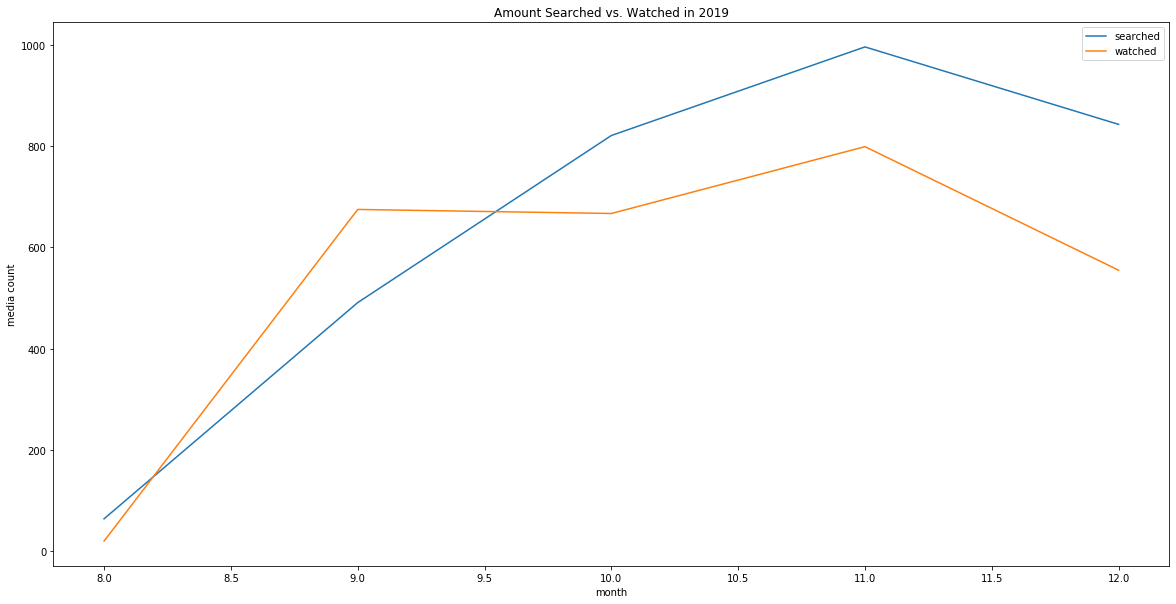

In [37]:
search_counts_2019 = []
youtube_counts_2019 = []
for f in files:
    df = pd.read_csv(f)
    df_2019 = df[df.years == 2019]
    v = df_2019.source.value_counts()
    if 'search' in v:
        search_counts_2019.append(v.search)

    if 'youtube' in v:
        youtube_counts_2019.append(v.youtube)

youtube_counts_2019 = np.array(youtube_counts_2019)/sum(youtube_counts_2019)    
search_counts_2019 = np.array(search_counts_2019)/sum(search_counts_2019)    

# df_search = pd.DataFrame(search_counts_2019, columns = ['search_counts'])
# df_YT = pd.DataFrame(youtube_counts_2019, columns = ['YT_counts'])

df_grouped = df_2019.groupby(['source', 'months']).count().reset_index()
df_grouped[['months', 'action', 'source']]
watched = df_grouped[df_grouped['source'] == 'youtube']
searched = df_grouped[df_grouped['source'] == 'search']

plot2 = plt.plot(searched['months'], searched['action'], label='searched')
plot1 = plt.plot(watched['months'], watched['action'], label='watched')
plt.xlabel('month')
plt.ylabel('media count')
plt.legend()
plt.title("Amount Searched vs. Watched in 2019")

Text(0.5, 1.0, 'Amount Searched vs Watched January-March 2020')

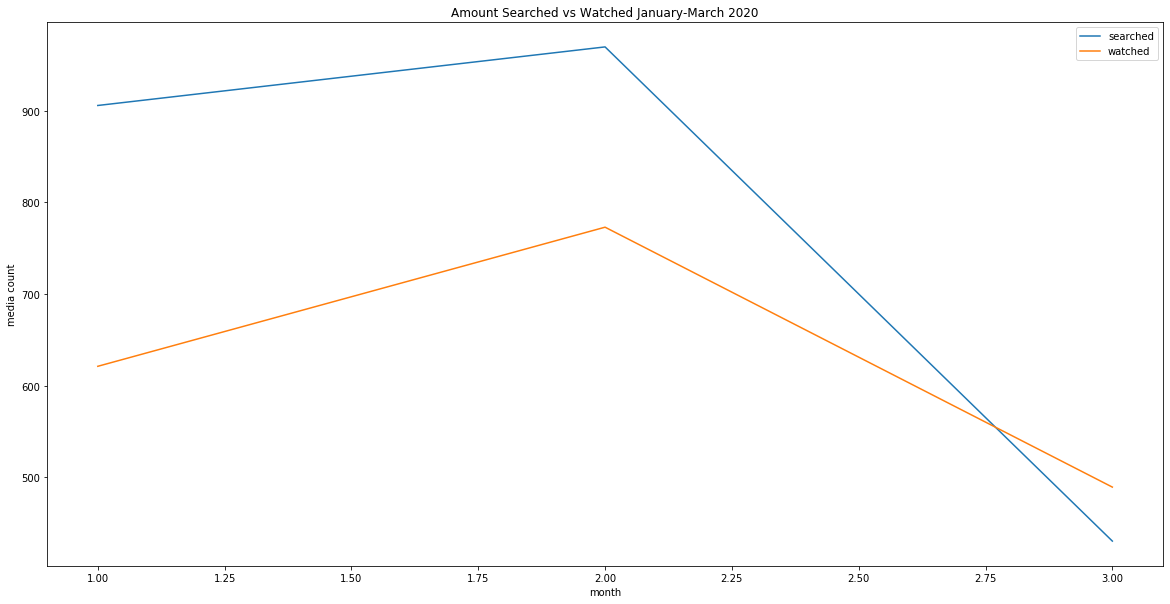

In [38]:
search_counts_jan = []
youtube_counts_jan = []
for f in files:
    df = pd.read_csv(f)
    df_jan_march=df[df.years == 2020]
    df_jan_march=df[df.months < 4]
    v = df_jan.source.value_counts()
    if 'search' in v:
        search_counts_jan.append(v.search)

    if 'youtube' in v:
        youtube_counts_jan.append(v.youtube)

youtube_counts_jan = np.array(youtube_counts_jan)/sum(youtube_counts_jan)    
search_counts_jan = np.array(search_counts_jan)/sum(search_counts_jan)    

df_grouped = df_jan_march.groupby(['source', 'months']).count().reset_index()
df_grouped[['months', 'action', 'source']]
watched = df_grouped[df_grouped['source'] == 'youtube']
searched = df_grouped[df_grouped['source'] == 'search']

plot2 = plt.plot(searched['months'], searched['action'], label='searched')
plot1 = plt.plot(watched['months'], watched['action'], label='watched')
plt.xlabel('month')
plt.ylabel('media count')
plt.legend()
plt.title("Amount Searched vs Watched January-March 2020")

In [26]:
import ast
def get_cat_name(string):
    if string:
        if type(string) != float:
            content = ast.literal_eval(string)
            if type(content) == list:
                if len(content) != 0:
                    cat_name = content[0]
                    if type(content[0]) == list:
                        cat_name = content[0][0].split('/')[1] 
                    return cat_name


Text(0.5, 1.0, 'Most Popular Categories of Youtube Videos in 2019')

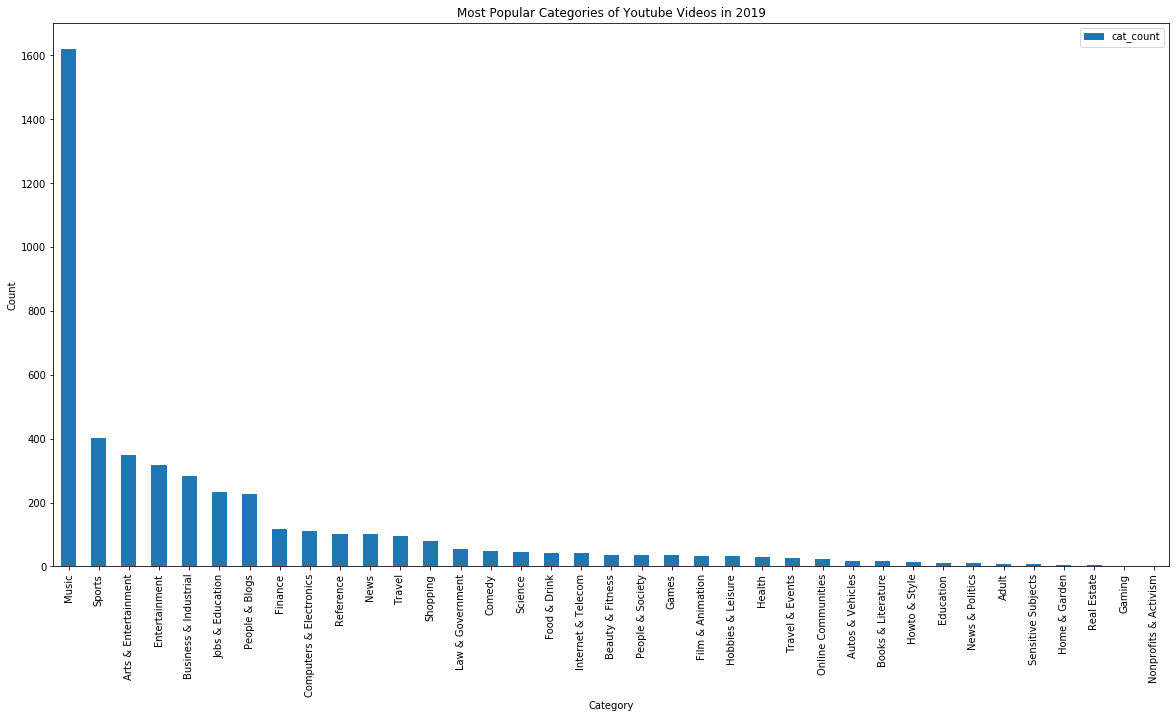

In [39]:
cat_list_2019 = df_2019['categories'].to_list()
cat_list_jan = df_jan['categories'].to_list()
cat_list_feb = df_feb['categories'].to_list()
cat_list_march = df_march['categories'].to_list()
cat_list_jan_march = df_jan_march['categories'].to_list()

cat_list_2019_fix = []
cat_list_jan_fix = []
cat_list_feb_fix = []
cat_list_march_fix = []
cat_list_jan_march_fix = []

for e in cat_list_2019:
    cat_list_2019_fix.append(get_cat_name(e))
    
for e in cat_list_jan:
    cat_list_jan_fix.append(get_cat_name(e))
    
for e in cat_list_feb:
    cat_list_feb_fix.append(get_cat_name(e))
    
for e in cat_list_march:
    cat_list_march_fix.append(get_cat_name(e))
    
for e in cat_list_jan_march:
    cat_list_jan_march_fix.append(get_cat_name(e))

df_2019_cat = pd.DataFrame(cat_list_2019_fix, columns = ['category'])
df_jan_cat = pd.DataFrame(cat_list_jan_fix, columns = ['category'])
df_feb_cat = pd.DataFrame(cat_list_feb_fix, columns = ['category'])
df_march_cat = pd.DataFrame(cat_list_march_fix, columns = ['category'])
df_jan_march_cat = pd.DataFrame(cat_list_jan_march_fix, columns = ['category'])

df_2019_cat['category'].value_counts().reset_index(name='cat_count').plot.bar(x='index', y='cat_count')
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title("Most Popular Categories of Youtube Videos in 2019")

Text(0.5, 1.0, 'Most Popular Categories of Youtube Videos in January 2020')

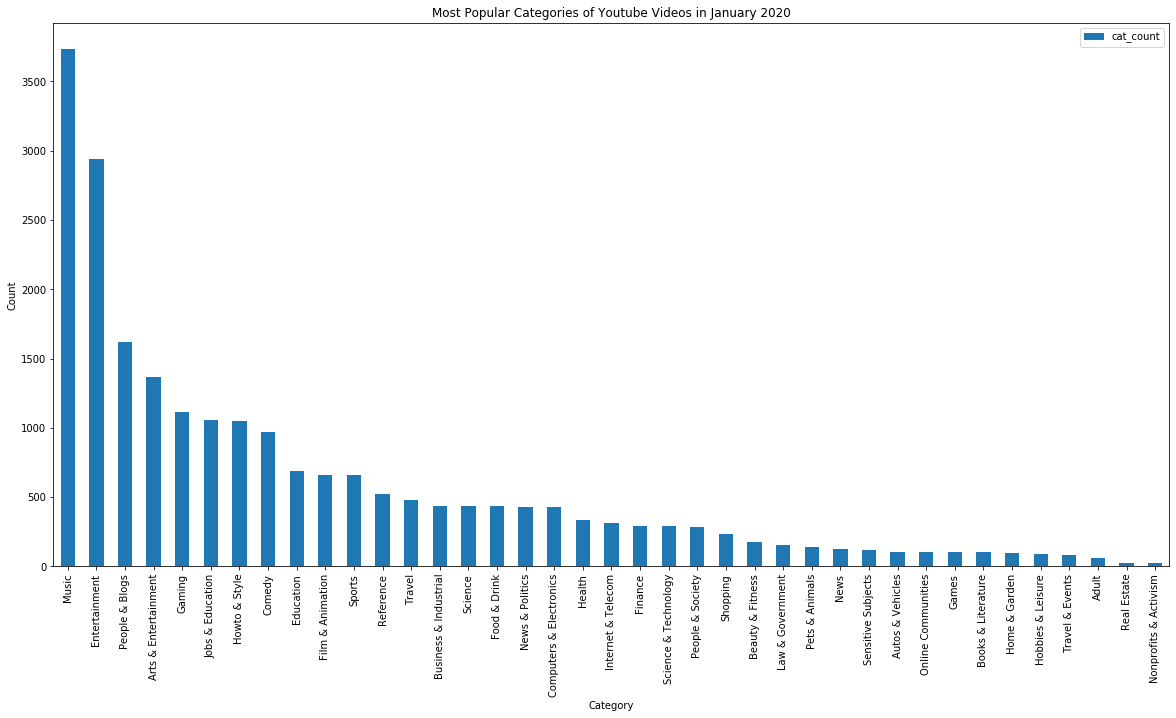

In [40]:
df_jan_cat['category'].value_counts().reset_index(name='cat_count').plot.bar(x='index', y='cat_count')
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title("Most Popular Categories of Youtube Videos in January 2020")

Text(0.5, 1.0, 'Most Popular Categories of Youtube Videos in February 2020')

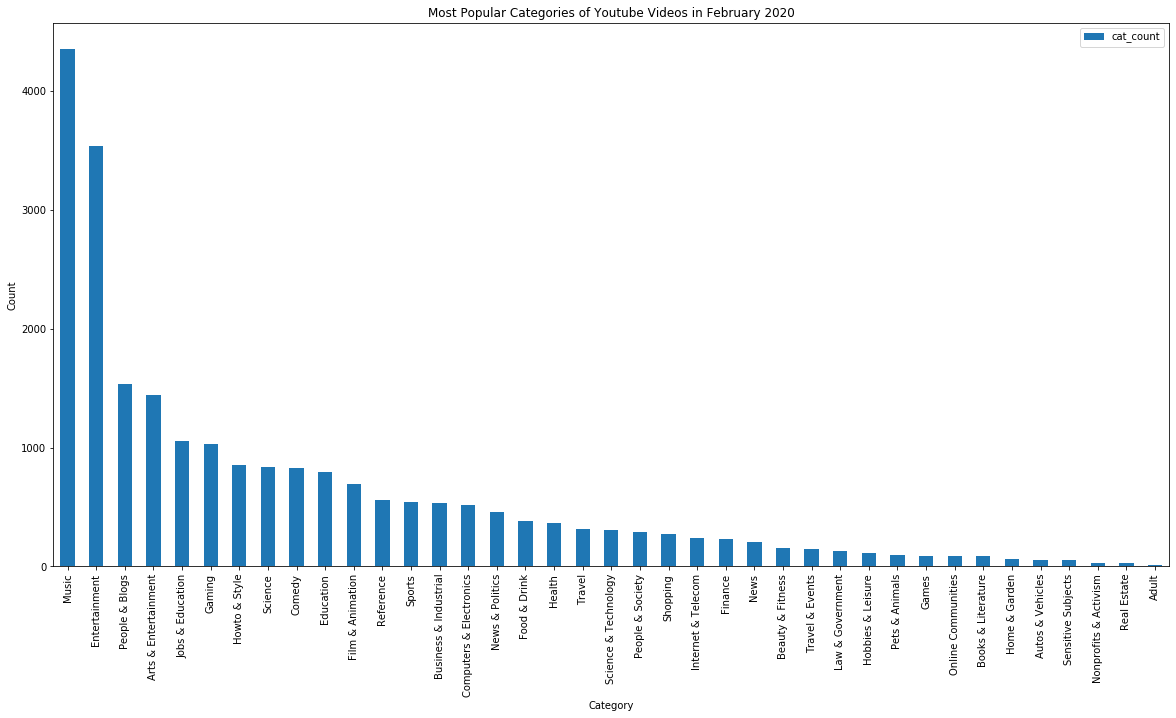

In [41]:
df_feb_cat['category'].value_counts().reset_index(name='cat_count').plot.bar(x='index', y='cat_count')
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title("Most Popular Categories of Youtube Videos in February 2020")

Text(0.5, 1.0, 'Most Popular Categories of Youtube Videos in March 2020')

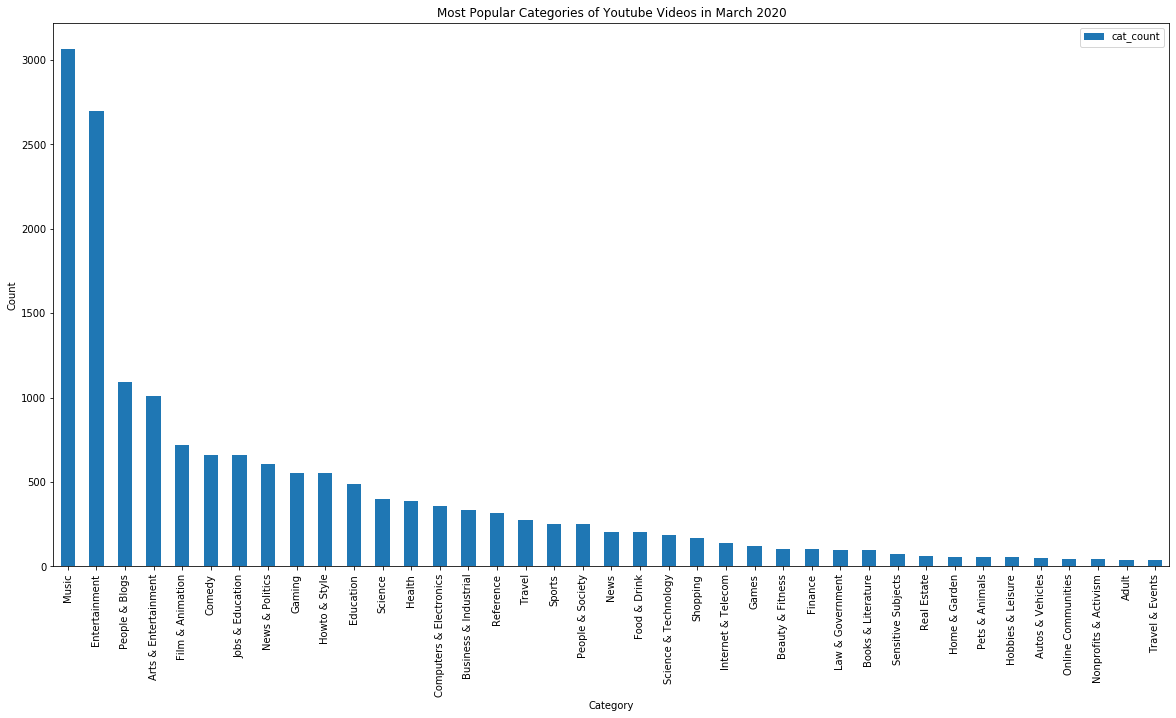

In [42]:
df_march_cat['category'].value_counts().reset_index(name='cat_count').plot.bar(x='index', y='cat_count')
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title("Most Popular Categories of Youtube Videos in March 2020")

Text(0.5, 1.0, 'Most Popular Categories of Youtube Videos in January-March 2020')

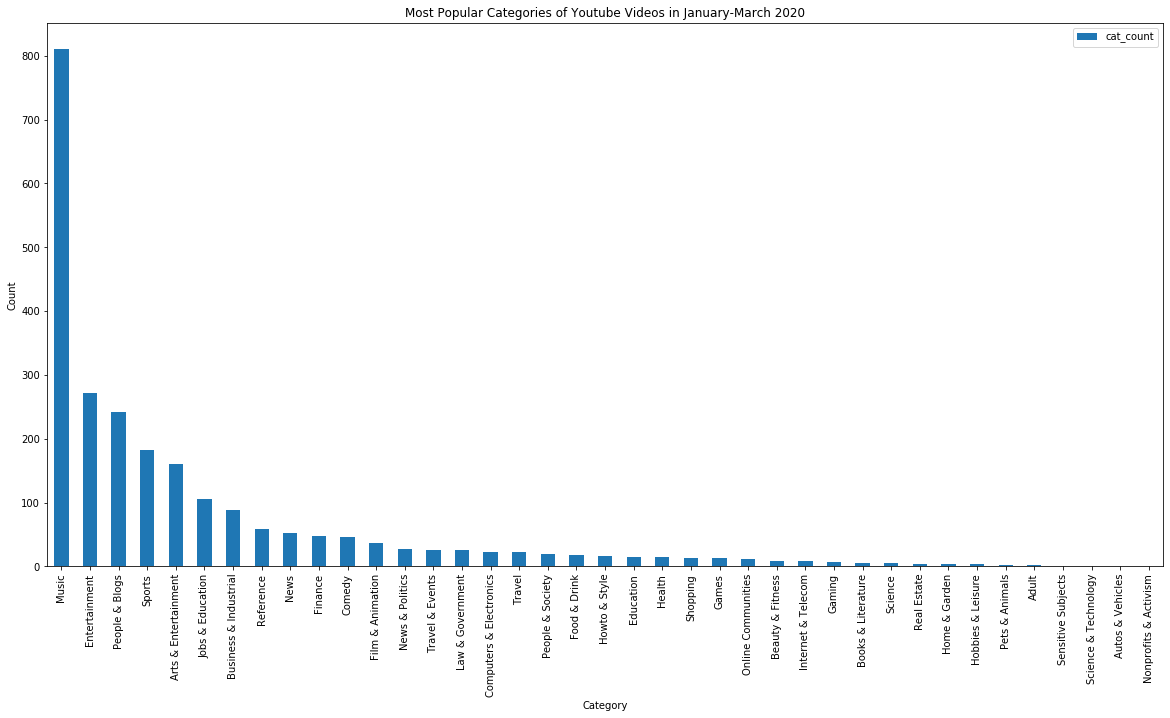

In [43]:
df_jan_march_cat['category'].value_counts().reset_index(name='cat_count').plot.bar(x='index', y='cat_count')
plt.rcParams['figure.figsize'] = (20,10)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title("Most Popular Categories of Youtube Videos in January-March 2020")